**IMPORTING LIBRARIES**

In [82]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import plotly.express as px
import numpy as np

**PROBLEM STATEMENT**

The objective of this project is to develop a predictive model to determine whether a loan will default or not based on a person's personal, professional, financial data, and loan specifications. The model will assist lenders and financial institutions in assessing the creditworthiness of borrowers and making informed decisions about loan approvals.

**DATASET LOADING**

In [83]:
df = pd.read_csv("/content/Loan_default.csv")

In [84]:
df.shape

(11345, 18)

**DATA PROFILING**

In [85]:
df

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11340,17F438CPQY,19,22189,66827,784,48,1,18.86,60,0.70,Master's,Part-time,Married,No,Yes,Home,Yes,0
11341,CHJB2JDBBU,40,36523,136558,379,91,1,24.89,36,0.25,High School,Self-employed,Single,No,No,Other,No,0
11342,SVKQ8Y2D2M,40,114420,11167,373,52,2,20.46,24,0.58,PhD,Full-time,Divorced,Yes,No,Other,Yes,0
11343,4RKLEBSW36,38,114296,20143,430,100,4,7.58,36,0.70,High School,Unemployed,Married,No,No,Home,No,0


In [86]:
df.columns

Index(['LoanID', 'Age', 'Income', 'LoanAmount', 'CreditScore',
       'MonthsEmployed', 'NumCreditLines', 'InterestRate', 'LoanTerm',
       'DTIRatio', 'Education', 'EmploymentType', 'MaritalStatus',
       'HasMortgage', 'HasDependents', 'LoanPurpose', 'HasCoSigner',
       'Default'],
      dtype='object')

In [87]:
df.head()

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0


In [88]:
df.tail()

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
11340,17F438CPQY,19,22189,66827,784,48,1,18.86,60,0.70,Master's,Part-time,Married,No,Yes,Home,Yes,0
11341,CHJB2JDBBU,40,36523,136558,379,91,1,24.89,36,0.25,High School,Self-employed,Single,No,No,Other,No,0
11342,SVKQ8Y2D2M,40,114420,11167,373,52,2,20.46,24,0.58,PhD,Full-time,Divorced,Yes,No,Other,Yes,0
11343,4RKLEBSW36,38,114296,20143,430,100,4,7.58,36,0.70,High School,Unemployed,Married,No,No,Home,No,0
11344,RNFA6WH07P,33,105380,71419,352,114,4,23.57,12,0.25,PhD,Self-employed,Married,No,No,Education,No,0


In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11345 entries, 0 to 11344
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   LoanID          11345 non-null  object 
 1   Age             11345 non-null  int64  
 2   Income          11345 non-null  int64  
 3   LoanAmount      11345 non-null  int64  
 4   CreditScore     11345 non-null  int64  
 5   MonthsEmployed  11345 non-null  int64  
 6   NumCreditLines  11345 non-null  int64  
 7   InterestRate    11345 non-null  float64
 8   LoanTerm        11345 non-null  int64  
 9   DTIRatio        11345 non-null  float64
 10  Education       11345 non-null  object 
 11  EmploymentType  11345 non-null  object 
 12  MaritalStatus   11345 non-null  object 
 13  HasMortgage     11345 non-null  object 
 14  HasDependents   11345 non-null  object 
 15  LoanPurpose     11345 non-null  object 
 16  HasCoSigner     11345 non-null  object 
 17  Default         11345 non-null 

In [90]:
df.describe()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Default
count,11345.00000,11345.000000,11345.000000,11345.000000,11345.000000,11345.000000,11345.000000,11345.000000,11345.000000,11345.000000
mean,43.48074,83043.892728,127815.372499,574.399912,58.450595,2.494315,13.450741,36.117409,0.503780,0.118731
std,14.90843,39126.668721,70680.086282,157.917771,34.413298,1.120786,6.640360,16.978757,0.230287,0.323486
min,18.00000,15000.000000,5005.000000,300.000000,0.000000,1.000000,2.000000,12.000000,0.100000,0.000000
25%,31.00000,49263.000000,66756.000000,438.000000,28.000000,1.000000,7.660000,24.000000,0.310000,0.000000
50%,43.00000,83052.000000,127643.000000,575.000000,59.000000,2.000000,13.510000,36.000000,0.510000,0.000000
75%,56.00000,116975.000000,189165.000000,708.000000,88.000000,4.000000,19.130000,48.000000,0.700000,0.000000
max,69.00000,149997.000000,249950.000000,849.000000,119.000000,4.000000,25.000000,60.000000,0.900000,1.000000


**DATA PRE-PROCESSING**

In [91]:
df.isnull().sum()

LoanID            0
Age               0
Income            0
LoanAmount        0
CreditScore       0
MonthsEmployed    0
NumCreditLines    0
InterestRate      0
LoanTerm          0
DTIRatio          0
Education         0
EmploymentType    0
MaritalStatus     0
HasMortgage       0
HasDependents     0
LoanPurpose       0
HasCoSigner       0
Default           0
dtype: int64

There are no NULL value in the dataset

In [92]:
dfdup = df[df.duplicated()]

In [93]:
dfdup

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default


There are no DUPLICATE Values in the dataset

**QUESTIONS**

How data is distributed across the dataset

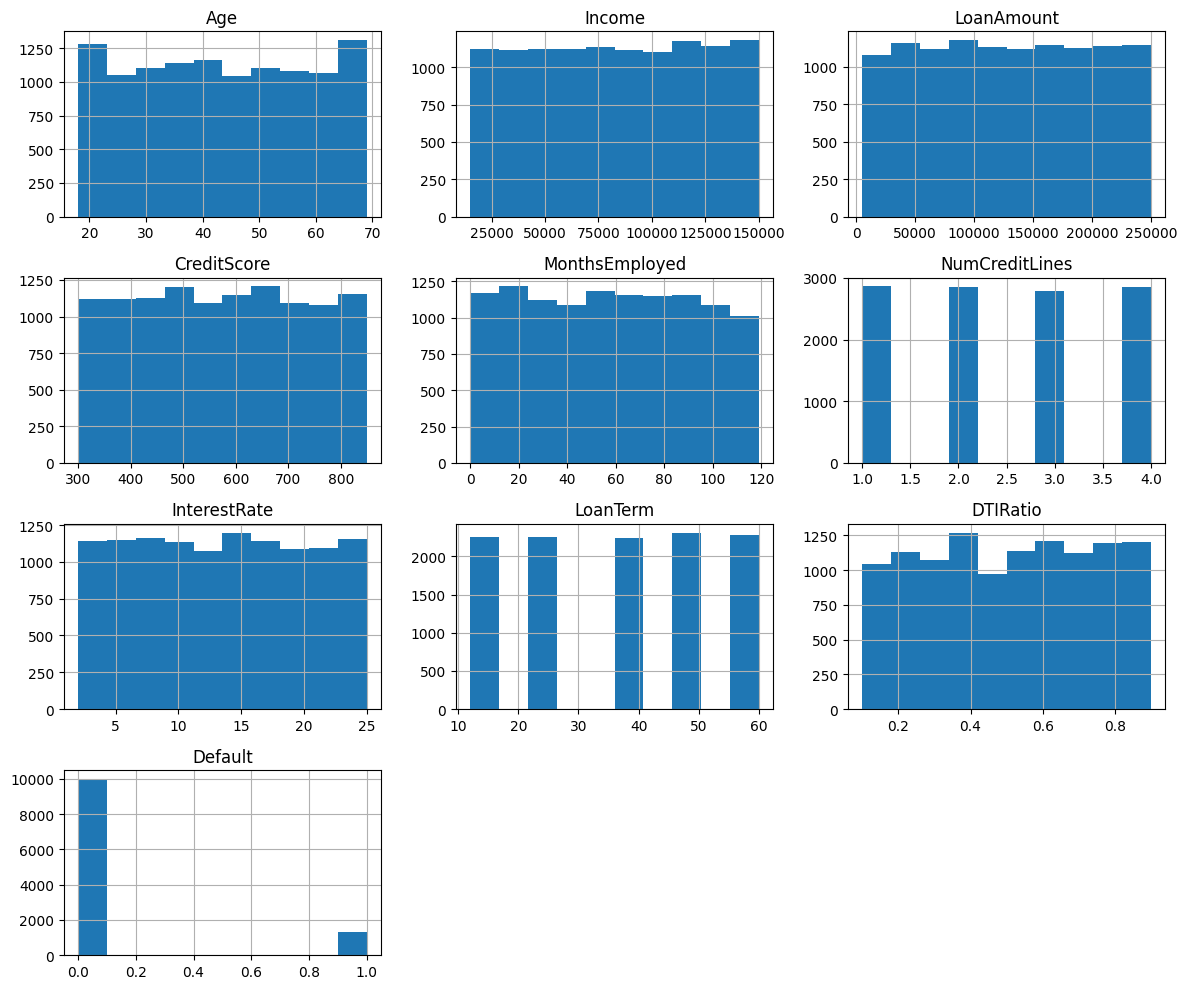

In [94]:
df.hist(figsize=(12, 10))
plt.tight_layout()
plt.show()

Correlation Matrix

<ipython-input-95-749037b052b8>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



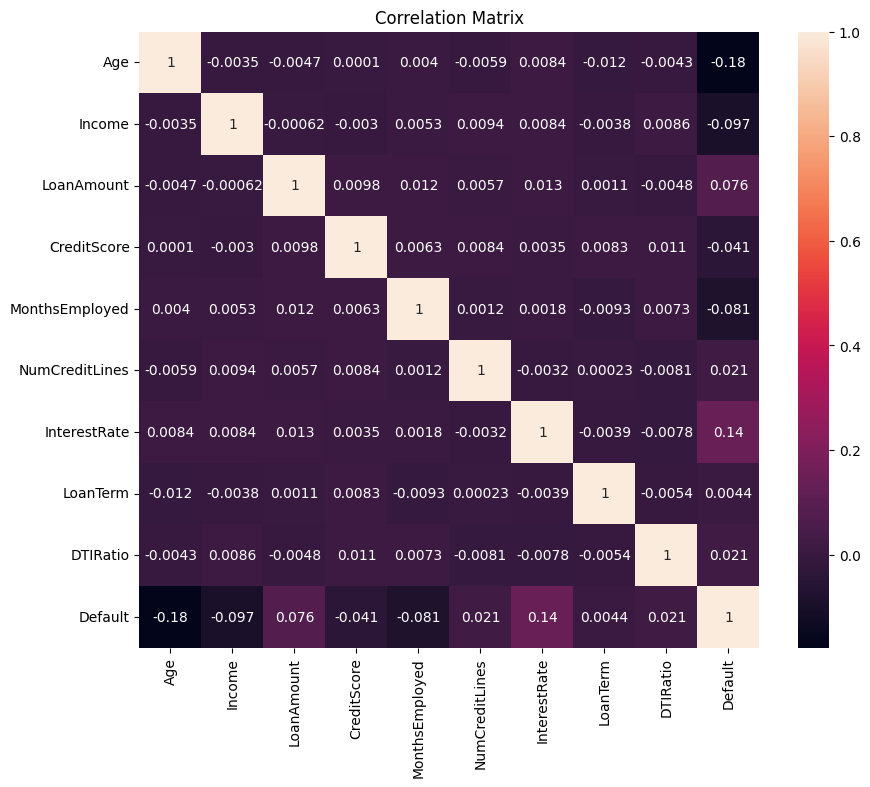

In [95]:
corr_matrix = df.corr()

# Plot a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True)
plt.title("Correlation Matrix")
plt.show()

What is the Impact of Age on Default

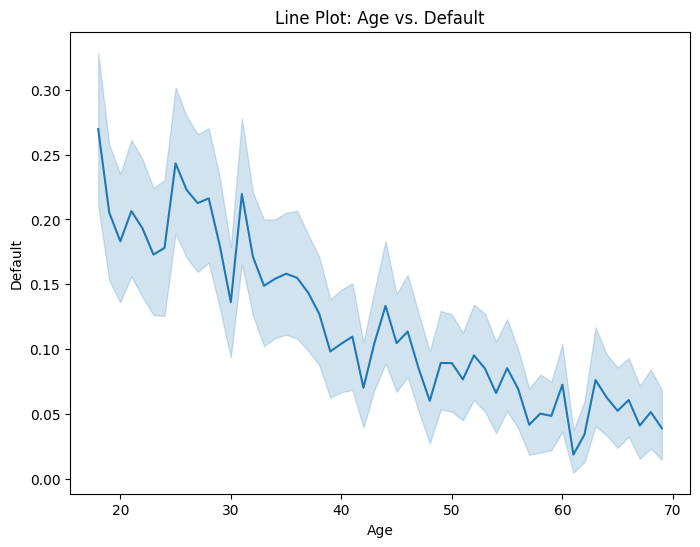

In [96]:
plt.figure(figsize=(8, 6))
sns.lineplot(x=df['Age'], y=df['Default'])
plt.xlabel('Age')
plt.ylabel('Default')
plt.title('Line Plot: Age vs. Default')
plt.show()

what is the Relationship Between Income and Default

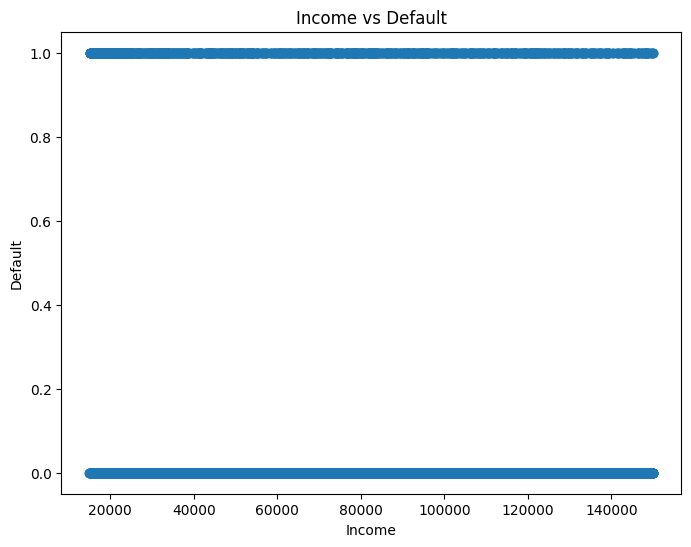

In [97]:
plt.figure(figsize=(8, 6))
plt.scatter(x=df['Income'],y=df['Default'])
plt.xlabel('Income')
plt.ylabel('Default')
plt.title('Income vs Default')
plt.show()

Does mental mental health history have an impact on stress levels

In [98]:
px.scatter(df.head(1000), x='LoanAmount', y='Default', color='NumCreditLines', hover_data=['LoanID', 'Age', 'Income', 'CreditScore','MonthsEmployed','InterestRate', 'LoanTerm',
       'DTIRatio', 'Education', 'EmploymentType', 'MaritalStatus','HasMortgage', 'HasDependents', 'LoanPurpose', 'HasCoSigner'],facet_row='NumCreditLines')

What is the relationship between CreditScore and loan default status?

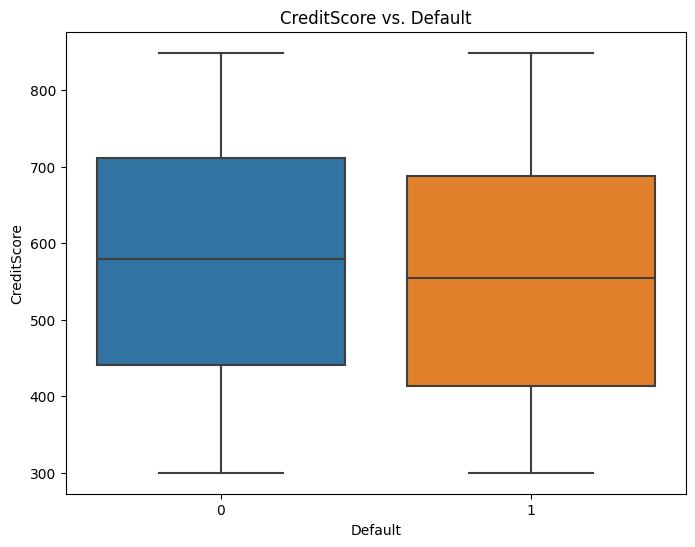

In [99]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Default'], y=df['CreditScore'])
plt.xlabel('Default')
plt.ylabel('CreditScore')
plt.title('CreditScore vs. Default')
plt.show()

How does the default rate vary with the number of months employed?

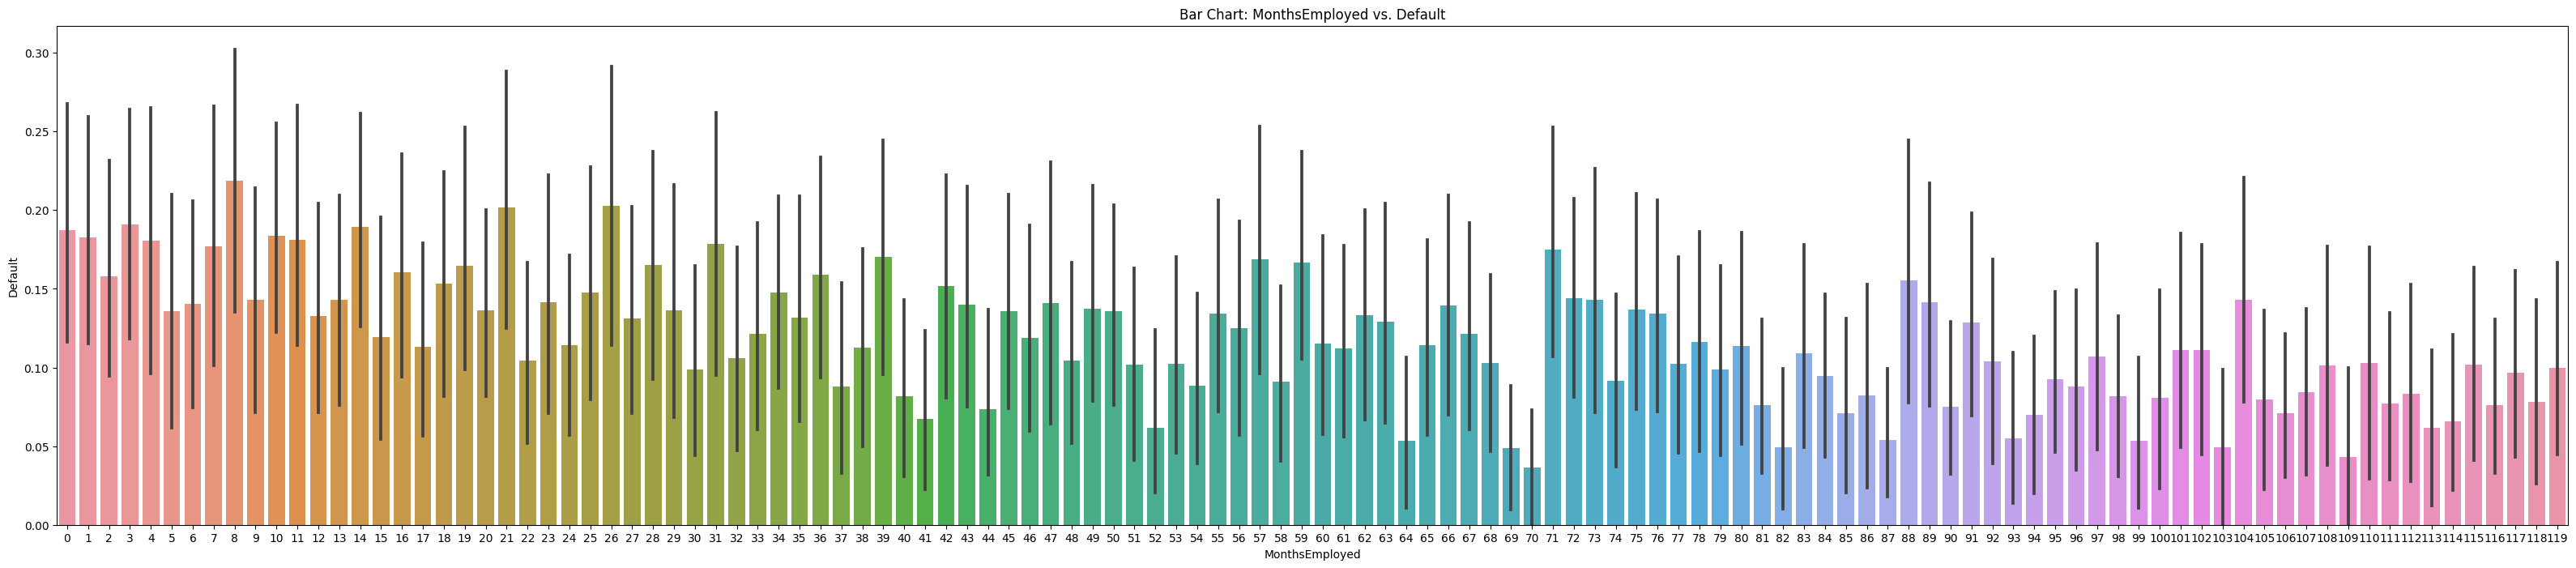

In [100]:
plt.figure(figsize=(40,8))
sns.barplot(x=df['MonthsEmployed'], y=df['Default'])
plt.xlabel('MonthsEmployed')
plt.ylabel('Default')
plt.title('Bar Chart: MonthsEmployed vs. Default')
plt.show()

How does the default rate change with the number of credit lines?

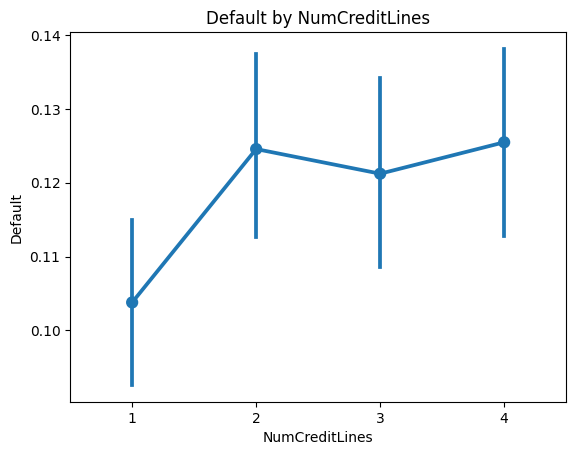

In [101]:
sns.pointplot(x='NumCreditLines', y='Default', data=df)
plt.xlabel('NumCreditLines')
plt.ylabel('Default')
plt.title('Default by NumCreditLines')
plt.show()

Default rate across categorical variables

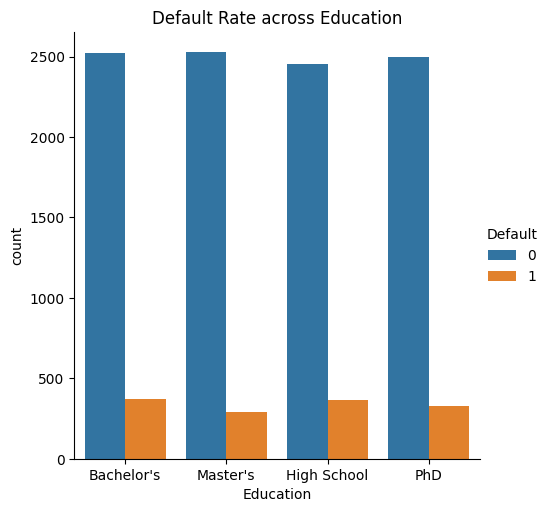

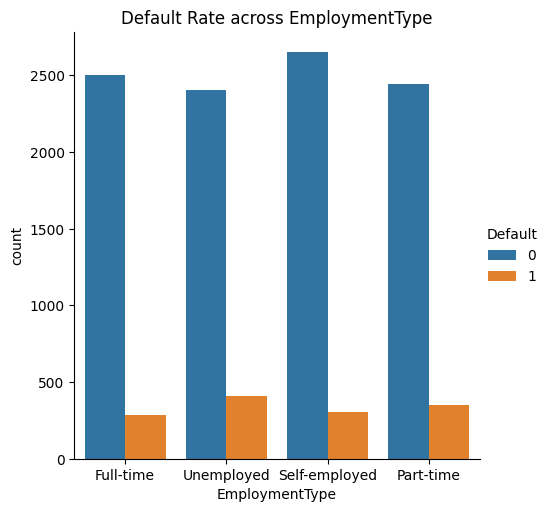

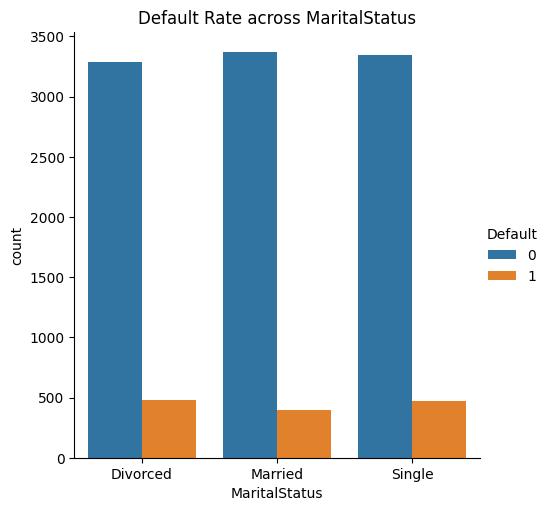

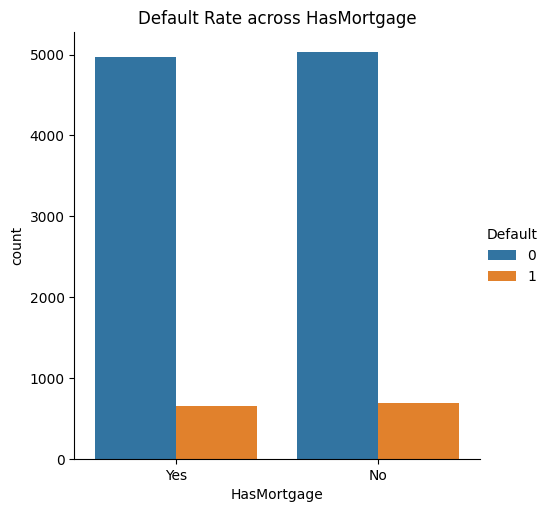

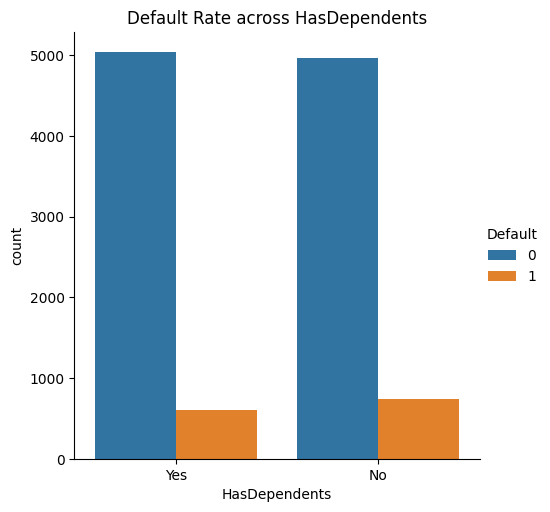

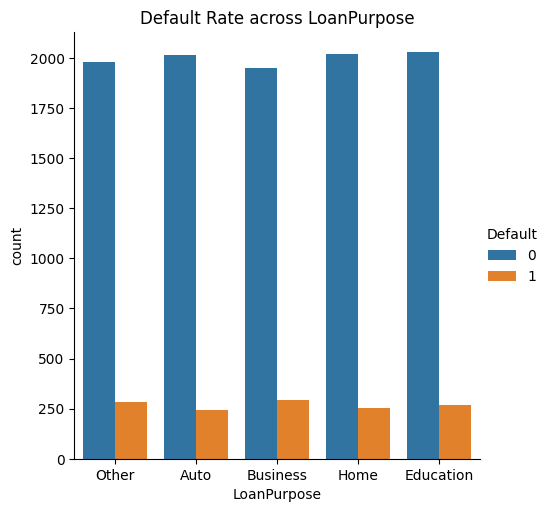

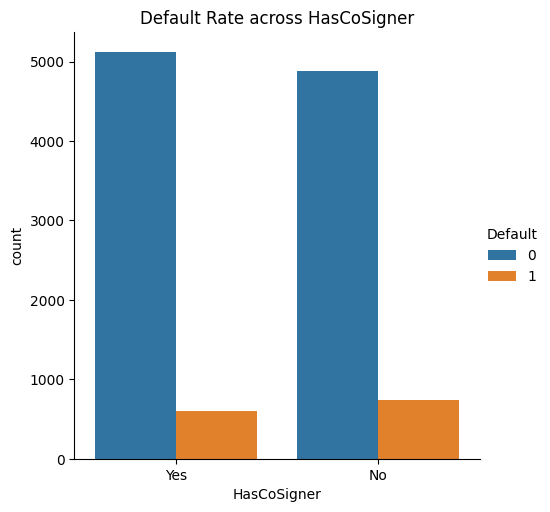

In [102]:
categorical_cols = ['Education', 'EmploymentType', 'MaritalStatus', 'HasMortgage', 'HasDependents', 'LoanPurpose', 'HasCoSigner']
for col in categorical_cols:
    sns.catplot(x=col, hue='Default', kind='count', data=df)
    plt.title(f'Default Rate across {col}')
    plt.show()

**MACHINE LEARNING ALOGORITHMS**

In [103]:
# importing required libraries to perform the machine learning alogorithms
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder

In [104]:
# Encoding categorical variables
label_encoder = LabelEncoder()
df['Education'] = label_encoder.fit_transform(df['Education'])
df['EmploymentType'] = label_encoder.fit_transform(df['EmploymentType'])
df['MaritalStatus'] = label_encoder.fit_transform(df['MaritalStatus'])
df['HasMortgage'] = label_encoder.fit_transform(df['HasMortgage'])
df['HasDependents'] = label_encoder.fit_transform(df['HasDependents'])
df['LoanPurpose'] = label_encoder.fit_transform(df['LoanPurpose'])
df['HasCoSigner'] = label_encoder.fit_transform(df['HasCoSigner'])

In [105]:
# Define features and target variable
X = df.drop(['LoanID', 'Default'], axis=1)
y = df['Default']

In [106]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Random Forest**

In [107]:
# Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_predictions)

print("Random Forest Accuracy:", rf_accuracy)
print("Random Forest Classification Report:\n", classification_report(y_test, rf_predictions))

Random Forest Accuracy: 0.873071837814015
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.99      0.93      1986
           1       0.37      0.02      0.05       283

    accuracy                           0.87      2269
   macro avg       0.62      0.51      0.49      2269
weighted avg       0.81      0.87      0.82      2269



**Decision Tree**

In [108]:
# Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
dt_predictions = dt_model.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_predictions)

print("Decision Tree Accuracy:", dt_accuracy)
print("Decision Tree Classification Report:\n", classification_report(y_test, dt_predictions))

Decision Tree Accuracy: 0.7946231820185103
Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.88      0.88      1986
           1       0.20      0.22      0.21       283

    accuracy                           0.79      2269
   macro avg       0.55      0.55      0.55      2269
weighted avg       0.80      0.79      0.80      2269



**Logistic Regression**

In [109]:
from sklearn.linear_model import LogisticRegression

In [112]:
# Logistic Regression
lr_model = LogisticRegression(random_state=42,max_iter=500)
lr_model.fit(X_train, y_train)
lr_predictions = lr_model.predict(X_test)
lr_accuracy = accuracy_score(y_test, lr_predictions)

print("Logistic Regression Accuracy:", lr_accuracy)
print("Logistic Regression Classification Report:\n", classification_report(y_test, lr_predictions))

Logistic Regression Accuracy: 0.874834728955487
Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.88      1.00      0.93      1986
           1       0.46      0.02      0.04       283

    accuracy                           0.87      2269
   macro avg       0.67      0.51      0.49      2269
weighted avg       0.83      0.87      0.82      2269



**Linear Regression**

In [111]:
# Create a linear regression model
model = LinearRegression()
# Fit the model to the training data
model.fit(X_train, y_train)
# Predict the target variable for the test data
y_pred = model.predict(X_test)
# Evaluate the model
score = model.score(X_test, y_test)
print("R-squared score:", score)

R-squared score: 0.05892831201583981
